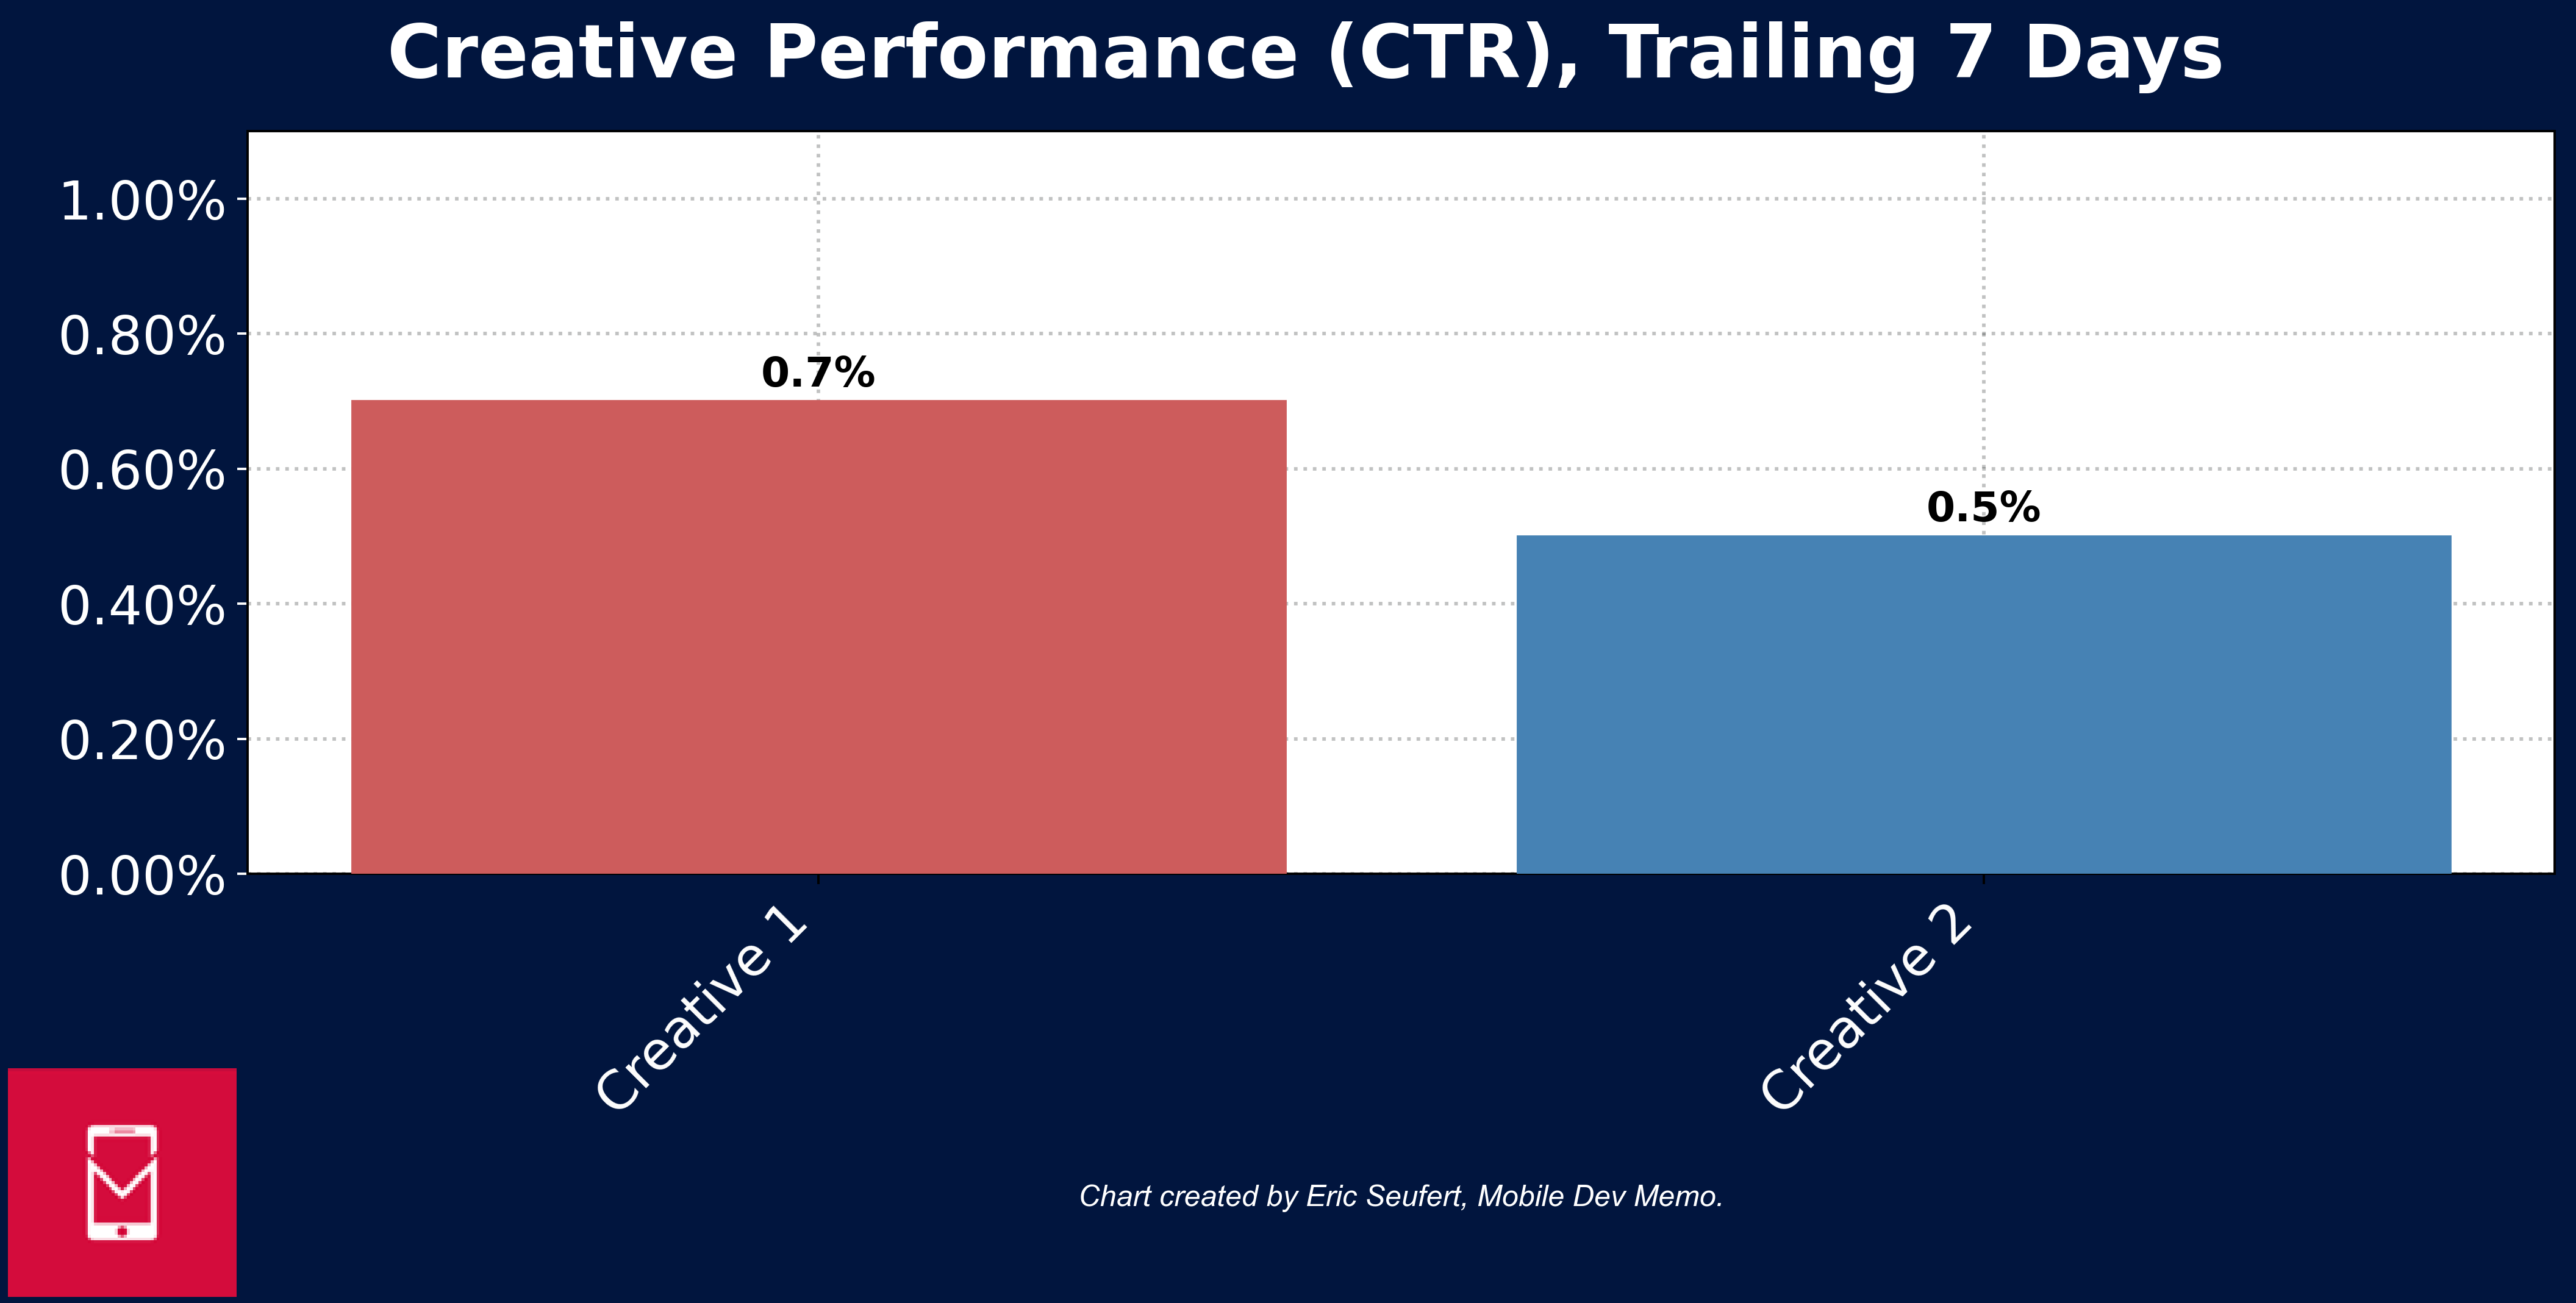

In [4]:
import sys
import os
sys.path.append(os.path.abspath('/Users/ericseufert/Desktop/CODE/rrank/RRANK'))
import rrankconfig as rrc
import rrank_googleplay as rgp
import rrank_appstore as ras
import rrank_db as rrdb
import rrank_chart as rrchart
import rrankutils as rru
from datetime import datetime as dt, timedelta
import rrank_api_handlers as rrapi
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as pltcolors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib.offsetbox import (OffsetImage, AnchoredOffsetbox)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MaxNLocator, FuncFormatter, AutoMinorLocator
import yfinance as yf
import numpy as np
import textwrap
import requests
import random

def generate_numbers( target_avg, count=7, variance=1 ):
    # Step 1: Generate 'count' random numbers around the target average with some variation
    numbers = [target_avg + random.uniform(-variance, variance) for _ in range(count)]
    
    # Step 2: Calculate the current average and adjust the list to match the target average
    current_avg = sum(numbers) / count
    adjustment = target_avg - current_avg
    numbers = [ num + adjustment for num in numbers ]
    
    return numbers

data_label_fontsize = 18
axis_label_fontsize = 18
fig_dpi = 350
fig_width = 12

# Setup figure and axes
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, 6), dpi=fig_dpi)
fig.patch.set_facecolor('xkcd:navy')
plt.rcParams['figure.figsize'] = [fig_width, 6]

data = {
    'Creative 1': .7,
    'Creative 2': .5
}

title = 'Creative Performance (CTR), Trailing 7 Days'
annotation_text = "Chart created by Eric Seufert, Mobile Dev Memo."

ax1.grid(which='major', linestyle=':', linewidth=1.2, alpha=.3, color='xkcd:charcoal')  # Major gridlines for quarters

# Set minor ticks for each month
#ax1.xaxis.set_minor_locator(mdates.MonthLocator())
#ax1.grid(which='minor', linestyle=':', linewidth=0.5, color='xkcd:charcoal')

plt.xticks(rotation=45, ha='right', fontsize=data_label_fontsize, color="white")

ax1.yaxis.set_major_formatter(FuncFormatter( rrchart.percent_formatter ) )

ax1.set_xlabel( annotation_text + "\n", fontdict=rrchart.chart_annotation_font, labelpad=20, color="white")
ax1.tick_params(axis='y', colors="white", labelsize=axis_label_fontsize)

ax1.set_facecolor('xkcd:white')
fig.suptitle( title, size=25, weight="bold", color="white")

ax1.set_ylim(bottom=0, top=ax1.get_ylim()[1] * 1.1)

rrchart.add_chart_watermark(fig, ax1)

bars = ax1.bar( data.keys(), data.values(), alpha=1, zorder=5 )

colors = [ 'indianred', 'steelblue' ]  # Adjust this list as needed

for i, bar in enumerate( bars ):
    bar.set_color( colors[ i ] )
    height = bar.get_height()
    ax1.text( bar.get_x() + bar.get_width() / 2., height + .01, \
             f'{height}%', ha='center', va='bottom', fontsize=14, \
             fontweight='bold', color="black")

#plt.legend( loc='upper right' )

plt.tight_layout()
plt.show()

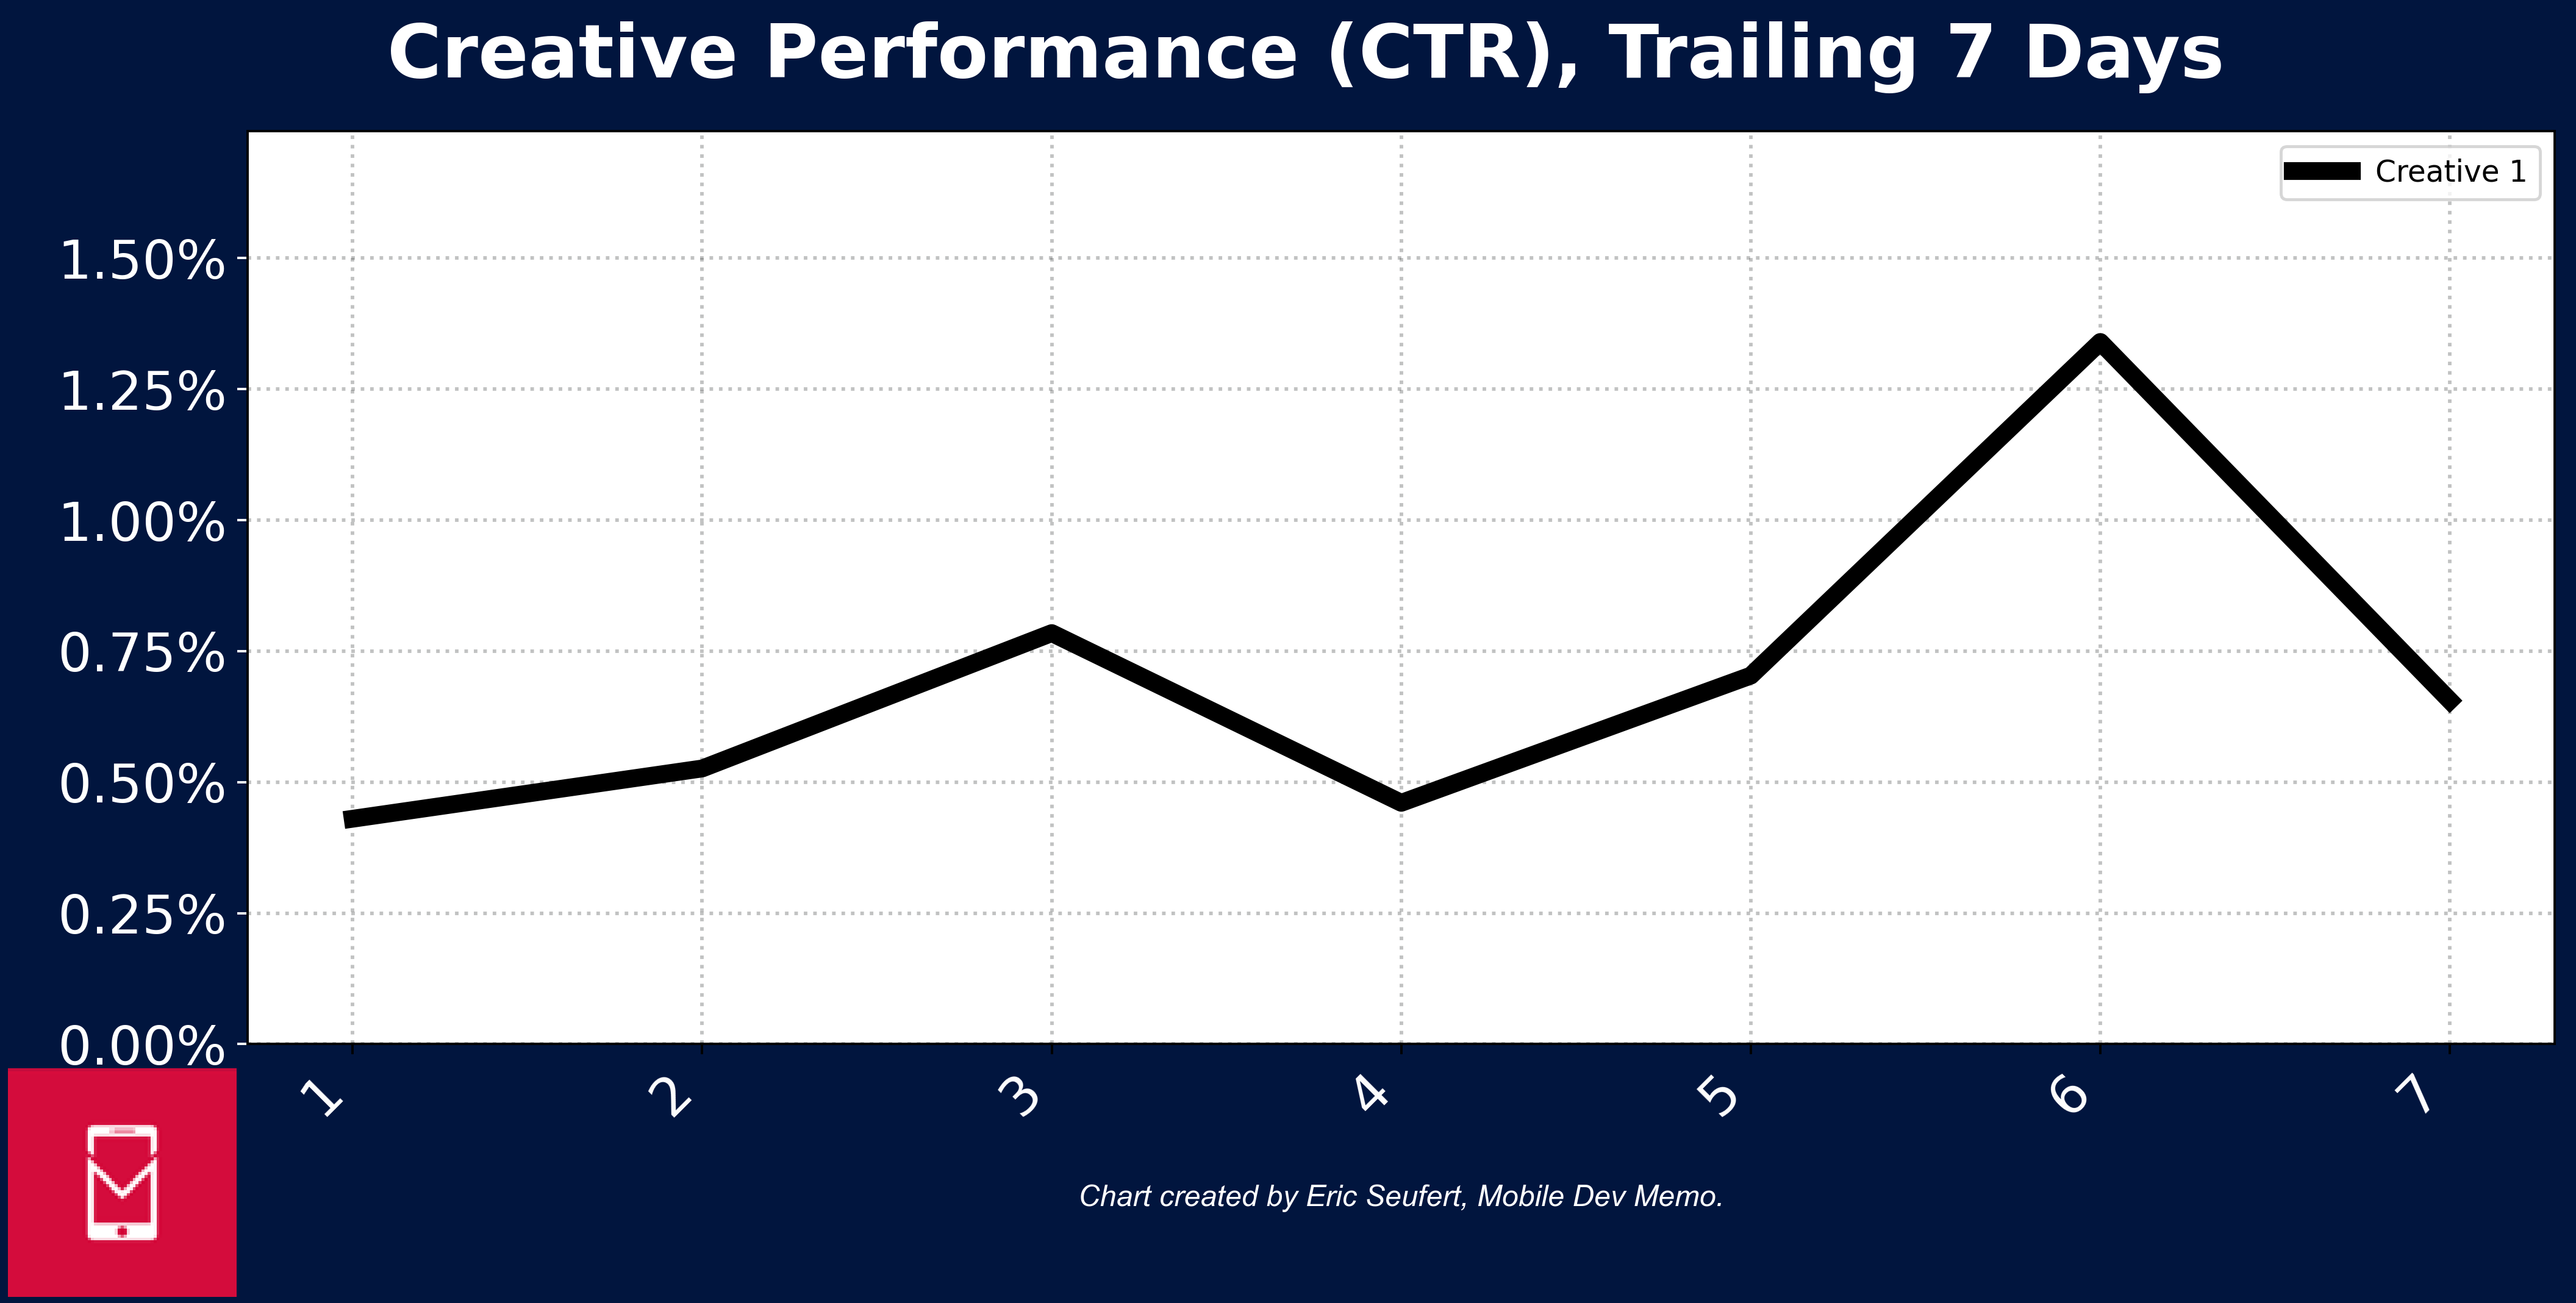

In [36]:
# Setup figure and axes
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, 6), dpi=fig_dpi)
fig.patch.set_facecolor('xkcd:navy')
plt.rcParams['figure.figsize'] = [fig_width, 6]

data = {
    'Creative 1': generate_numbers( .7, count=7, variance=.5 ),
    'Creative 2': generate_numbers( .5, count=7, variance=.1 )
}

title = 'Creative Performance (CTR), Trailing 7 Days'
annotation_text = "Chart created by Eric Seufert, Mobile Dev Memo."

ax1.grid(which='major', linestyle=':', linewidth=1.2, alpha=.3, color='xkcd:charcoal')  # Major gridlines for quarters

# Set minor ticks for each month
#ax1.xaxis.set_minor_locator(mdates.MonthLocator())
#ax1.grid(which='minor', linestyle=':', linewidth=0.5, color='xkcd:charcoal')

plt.xticks(rotation=45, ha='right', fontsize=data_label_fontsize, color="white")

ax1.yaxis.set_major_formatter(FuncFormatter( rrchart.percent_formatter ) )

ax1.set_xlabel( annotation_text + "\n", fontdict=rrchart.chart_annotation_font, labelpad=20, color="white")
ax1.tick_params(axis='y', colors="white", labelsize=axis_label_fontsize)

ax1.set_facecolor('xkcd:white')
fig.suptitle( title, size=25, weight="bold", color="white")

max_y = max( max( d ) for d in data.values() )
ax1.set_ylim(bottom=0, top=max_y * 1.3)

rrchart.add_chart_watermark(fig, ax1)

x_vals = [ i+1 for i in range( 7 ) ]
plt.plot( x_vals, data[ 'Creative 1' ], color='black', label='Creative 1', \
        linewidth=6 )

plt.legend( loc='best' )

plt.tight_layout()
plt.show()